In [5]:
# Paquetes para trabajar con imágenes
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

## Compresión de una imagen geométrica

1. Graficar la matriz A en blanco y negro, tomando 1 para blanco y 0 para negro.

In [3]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])
print(np.shape(A))

(25, 15)


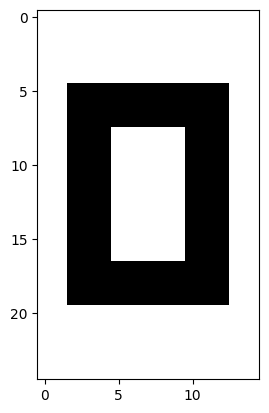

In [4]:
plt.imshow(A, cmap = "gray")

2. ¿Cuántas columnas distintas hay en el dibujo? ¿Cuántas filas distintas hay en $A$?

A partir de esa respuesta: 
- ¿Cuál es el máximo rango posible de $A$?
- ¿Cuántos valores singulares no nulos puede tener como máximo $A$?


3. ¿Cómo podríamos guardar en forma mas compacta esta matriz? (por ejemplo, sin guardar columnas repetidas)

### Valores singulares
Vamos a utilizar valores singulares para automatizar el proceso.

In [ ]:
# Calculamos la descomposición en valores singulares
[U, S, Vh] = np.linalg.svd(A)
print("Tamaño de U = ", np.shape(U))
print("Tamaño de S = ", np.shape(S))
print("Tamaño de Vh = ", np.shape(Vh))

In [ ]:
# Graficamos los valores singulares
plt.plot(S, '*')

In [ ]:
# Observamos que hay 3 valores singulares no nulos. Lo verificamos.
print(S)

4. Para evitar los errores numéricos, definimos una función que elimine de $\Sigma$ los valores singulares pequeños, dejando solo los primeros $k$ valores.

In [ ]:
# Función para eliminar de S los valores singulares a partir del k+1
# Toma como parámetro también A para saber el tamaño de Sigma.
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

In [ ]:
# Aplicamos la función para construir la matriz Sigma con 3 valores singulares no nulos
k = 3
S_trunc = truncateSigma(A, S, 3)
A_3 = U @ S_trunc @ Vh
plt.imshow(A_3, cmap='gray')

### Descomposición SVD reducida. 

Cuando $\Sigma$ tiene solo $k$ valores no nulos en la diagonal, podemos quedarnos con las primeras $k$ columnas de $U$ y las primeras $k$ columnas de $V$ (es decir, las primeras $k$ filas de $V$).

Obtenemos una descomposición que utiliza menos datos
$$
A = \tilde U \tilde \Sigma \tilde V^{*}
$$
con $\tilde U \in \mathbb{K}^{m \times k}$, $\tilde \Sigma \in \mathbb{K}^{k \times k}$, $\tilde V^{*} \in \mathbb{K}^{k \times n}$.

#### Ejercicio.
Demostrarlo, recordando la propiedad para $A$ de $m \times p$ y $B$ de $p \times n$,
$$A B = \sum_{i = 1}^p A_i B_i,$$
donde $A_i$ son las columnas de $A$ y $B_i$ son las filas de $B$.


In [ ]:
# Podemos construir A utilizando solo las primeras 3 columnas de U y 3 columnas de V (3 filas de Vh)
# y tomando solo la submatriz de 3x3 de S

k = 3
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

Observación: este método funciona para cualquier matriz de rango 3, no solo para matrices con columnas repetidas.

*Ejercicio:*
¿Cuántos datos se requerían para guardar la matriz original? ¿Cuántos datos se requieren para guardar la descomposición SVD reducida?

## Compresión de la imagen de un árbol

Aplicando la misma estrategia, pero convirtiendo también a 0 los autovalores pequeños obtenemos una forma de comprimir imágenes, perdiendo un poco de calidad en este caso.

In [ ]:
# Leemos el archivo
img = io.imread('tree2.jpg')
print(img.shape)

plt.imshow(img)

In [ ]:
# Lo convertimos a tonos de gris para simplificar la aplicación
imgGray = color.rgb2gray(img)
print(imgGray.shape)

plt.imshow(imgGray, cmap='gray')

# Grabamos la imagen
#plt.savefig('test2.png')

In [ ]:
# Calculamos la descomposición SVD de A y graficamos los valores singulares
A = imgGray
[U, S, Vh] = np.linalg.svd(A)
plt.plot(S, '*')

In [ ]:
# Graficamos los logaritmos para ver mejor los saltos
plt.plot(np.log(S), '*')
plt.savefig('logS')

In [ ]:
# Imprimimos los valores singulares a partir del 900
for i in range(900,1082):
    print(i, np.log(S[i]), S[i])


Vemos que podemos eliminar todos los valores singular a partir de i = 987 sin perder mucha información.


In [ ]:
S_trunc = truncateSigma(A, S, 987)       

In [ ]:
# Reconstruimos la imagen utilizando la nueva S
A_trunc = U @ S_trunc @ Vh
plt.imshow(A_trunc, cmap='gray')

In [ ]:
# Comparamos con la version original
plt.imshow(imgGray, cmap='gray')
np.linalg.norm(A_trunc-A)

In [ ]:
# ¿Cómo guardamos los datos para no guardar información de más?

# Podemos construir A utilizando solo las primeras k columnas de U y k columnas de V (k filas de Vh)
# y tomando solo la submatriz de 987x987 de Sigma

k = 987
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

In [ ]:
# A_zip y A_trunc son exactamente la misma matriz
np.linalg.norm(A_zip-A_trunc)

#### Ejercicio
¿Cuántos datos se requerían para guardar la matriz original? ¿Cuántos datos se requieren para guardar la descomposición SVD reducida? 

¿Hemos realizado una buena compresión de la imagen?

#### Seguimos reduciendo dimensiones

In [ ]:
# Probamos eliminar más valores singulares
k = 200
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')
print("Distancia entre matrices: ", np.linalg.norm(A_zip-A))

In [ ]:
# El color blanco se volvió gris...
A_zip[0:5,0:5]

In [ ]:
# Comprobamos si nos mantenemos en el rango [0, 1]
print("min = ", np.min(A_zip))
print("max = ", np.max(A_zip))

La función imshow con `cmap = gray` toma el mínimo de los valores como negro y el máximo como blanco. Pero nosotros queremos que siga utilizando la misma escala de colores que antes. Forzamos a que todos los valores estén entre 0 y 1. Es decir tomamos todos los negativos como negro, y los mayores que 1 como blanco.

In [ ]:
# Convertimos los valores mayores que 1 a 1 y los menores que 0 a 0.
A_zip = np.minimum(np.ones(A.shape), A_zip)
A_zip = np.maximum(np.zeros(A.shape), A_zip)

In [ ]:
# Graficamos
plt.imshow(A_zip, cmap='gray')

In [ ]:
# Calculamos la cantidad de datos en este caso. 
k = 200
[nr, nc] = A.shape
cant = k * nr + k * nc + k   # Datos en U, V y S respectivamente
print("Cantidad de datos originales: ", nr * nc)
print("Cantidad de datos en la imagen comprimida: ", cant)
print("Porcentaje de compresión: ", cant / (nr*nc) * 100)

In [ ]:
# Probamos eliminar más valores singulares
k = 20
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
A_zip = np.minimum(np.ones(A.shape), A_zip)
A_zip = np.maximum(np.zeros(A.shape), A_zip)
plt.imshow(A_zip, cmap='gray')

In [ ]:
# Calculamos la cantidad de datos en este caso. 
k = 20
[nr, nc] = A.shape
cant = k * nr + k * nc + k   # Datos en U, V y S respectivamente
print("Cantidad de datos originales: ", nr * nc)
print("Cantidad de datos en la imagen comprimida: ", cant)
print("Porcentaje de compresión: ", cant / (nr*nc) * 100)

#### Ejercicio

Repetir estos pasos para el ejemplo `quijote.jpg` de la práctica, y resolver los ejercicios 9 a 13.